In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time
df = pd.read_csv("heloc_dataset_v1.csv")

In [2]:
col_names = list(df.columns)
cols_numeric = df.select_dtypes(include= np.number).columns.tolist()
cols_string = df.select_dtypes(include=['object',]).columns.tolist()
df = df.loc[(df[col_names]!=-9).any(axis=1)]
df = df.loc[(df[col_names]!=-8).any(axis=1)]
df = df.loc[(df[col_names]!=-7).any(axis=1)]

array([[<AxesSubplot:title={'center':'ExternalRiskEstimate'}>,
        <AxesSubplot:title={'center':'MSinceOldestTradeOpen'}>,
        <AxesSubplot:title={'center':'MSinceMostRecentTradeOpen'}>,
        <AxesSubplot:title={'center':'AverageMInFile'}>,
        <AxesSubplot:title={'center':'NumSatisfactoryTrades'}>],
       [<AxesSubplot:title={'center':'NumTrades60Ever2DerogPubRec'}>,
        <AxesSubplot:title={'center':'NumTrades90Ever2DerogPubRec'}>,
        <AxesSubplot:title={'center':'PercentTradesNeverDelq'}>,
        <AxesSubplot:title={'center':'MSinceMostRecentDelq'}>,
        <AxesSubplot:title={'center':'MaxDelq2PublicRecLast12M'}>],
       [<AxesSubplot:title={'center':'MaxDelqEver'}>,
        <AxesSubplot:title={'center':'NumTotalTrades'}>,
        <AxesSubplot:title={'center':'NumTradesOpeninLast12M'}>,
        <AxesSubplot:title={'center':'PercentInstallTrades'}>,
        <AxesSubplot:title={'center':'MSinceMostRecentInqexcl7days'}>],
       [<AxesSubplot:title={'center'

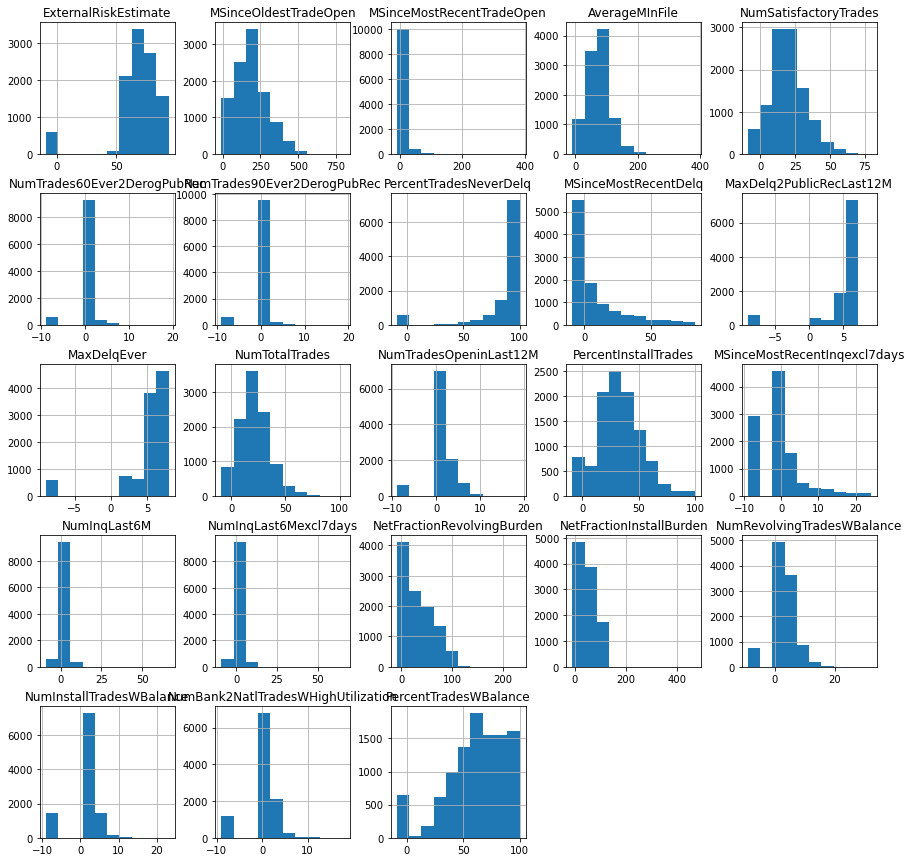

In [4]:
df.hist(figsize=(15,15))

<AxesSubplot:>

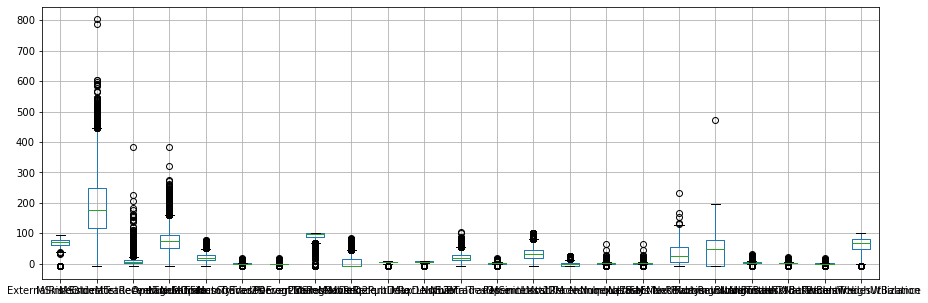

In [19]:
df_without_missing_rows.boxplot(figsize=(15,5))

In [5]:
df.describe()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,...,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000
mean,67.425758,184.205373,8.543455,73.843293,19.428052,0.042738,-0.142843,86.661536,6.762406,4.928291,...,32.166460,-0.325366,0.868152,0.812602,31.629888,39.158906,3.185008,0.976097,0.018071,62.079166
std,21.121621,109.683816,13.301745,38.782803,13.004327,2.513910,2.367397,25.999584,20.501250,3.756275,...,20.128634,6.067556,3.179304,3.143698,30.060140,42.101601,4.413173,4.060995,3.358135,27.711565
min,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,63.000000,118.000000,3.000000,52.000000,12.000000,0.000000,0.000000,87.000000,-7.000000,4.000000,...,20.000000,-7.000000,0.000000,0.000000,5.000000,-8.000000,2.000000,1.000000,0.000000,47.000000
50%,71.000000,178.000000,5.000000,74.000000,19.000000,0.000000,0.000000,96.000000,-7.000000,6.000000,...,31.000000,0.000000,1.000000,1.000000,25.000000,47.000000,3.000000,2.000000,0.000000,67.000000
75%,79.000000,249.500000,11.000000,95.000000,27.000000,1.000000,0.000000,100.000000,14.000000,7.000000,...,44.000000,1.000000,2.000000,2.000000,54.000000,79.000000,5.000000,3.000000,1.000000,82.000000
max,94.000000,803.000000,383.000000,383.000000,79.000000,19.000000,19.000000,100.000000,83.000000,9.000000,...,100.000000,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000


# Tree model

In [3]:
df.head(2)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0


In [3]:
X = df.iloc[:,1:24]
Y = pd.get_dummies(df.iloc[:,0])['Bad']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

df_train = pd.concat([X_train,Y_train],axis=1)
df_train = df_train.rename(columns={"Bad":"RiskPerformance"})
df_test = pd.concat([X_test,Y_test],axis=1)
df_test = df_test.rename(columns={"Bad":"RiskPerformance"})

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.impute import MissingIndicator
from sklearn.metrics import accuracy_score

X_train = df_train[df_train["ExternalRiskEstimate"]!=-9].iloc[:,:23]
X_test  = df_test[df_test["ExternalRiskEstimate"]!=-9].iloc[:,:23]
Y_train = df_train[df_train["ExternalRiskEstimate"]!=-9].iloc[:,23]
Y_test  = df_test[df_test["ExternalRiskEstimate"]!=-9].iloc[:,23]


minus_7_indicator_transformer = MissingIndicator(missing_values=-7, features='missing-only').fit(X_train)
minus_8_indicator_transformer = MissingIndicator(missing_values=-8, features='missing-only').fit(X_train)
column_names_minus_7 = X_train.columns.values[minus_7_indicator_transformer.features_].tolist() 
column_names_minus_7 = list(map(lambda s:str(s)+'=-7',column_names_minus_7)) 
column_names_minus_8 = X_train.columns.values[minus_8_indicator_transformer.features_].tolist() 
column_names_minus_8 = list(map(lambda s:str(s)+'=-8',column_names_minus_8))
column_names = X_train.columns.values.tolist() + column_names_minus_7 + column_names_minus_8
column_names

['ExternalRiskEstimate',
 'MSinceOldestTradeOpen',
 'MSinceMostRecentTradeOpen',
 'AverageMInFile',
 'NumSatisfactoryTrades',
 'NumTrades60Ever2DerogPubRec',
 'NumTrades90Ever2DerogPubRec',
 'PercentTradesNeverDelq',
 'MSinceMostRecentDelq',
 'MaxDelq2PublicRecLast12M',
 'MaxDelqEver',
 'NumTotalTrades',
 'NumTradesOpeninLast12M',
 'PercentInstallTrades',
 'MSinceMostRecentInqexcl7days',
 'NumInqLast6M',
 'NumInqLast6Mexcl7days',
 'NetFractionRevolvingBurden',
 'NetFractionInstallBurden',
 'NumRevolvingTradesWBalance',
 'NumInstallTradesWBalance',
 'NumBank2NatlTradesWHighUtilization',
 'PercentTradesWBalance',
 'MSinceMostRecentDelq=-7',
 'MSinceMostRecentInqexcl7days=-7',
 'MSinceOldestTradeOpen=-8',
 'MSinceMostRecentDelq=-8',
 'MSinceMostRecentInqexcl7days=-8',
 'NetFractionRevolvingBurden=-8',
 'NetFractionInstallBurden=-8',
 'NumRevolvingTradesWBalance=-8',
 'NumInstallTradesWBalance=-8',
 'NumBank2NatlTradesWHighUtilization=-8',
 'PercentTradesWBalance=-8']

In [8]:

do_nothing_imputer = ColumnTransformer([("Imputer -7 to mean", SimpleImputer(missing_values=-7, strategy='mean'), [])], remainder='passthrough')

feature_expansion = FeatureUnion([("do nothing", do_nothing_imputer),
                                  ("add features for -7", MissingIndicator(missing_values=-7, features='missing-only')),
                                  ("add features for -8", MissingIndicator(missing_values=-8, features='missing-only'))])
 
pipeline = Pipeline([("expand features", feature_expansion), 
                 ("replace -7 with -8", SimpleImputer(missing_values=-7, strategy='constant', fill_value=-8)),
                 ("replace -8 with mean", SimpleImputer(missing_values=-8, strategy='mean'))])

arr_X_train_t = pipeline.fit_transform(X_train)
arr_X_test_t = pipeline.transform(X_test) 


In [9]:
X_train_t = pd.DataFrame(arr_X_train_t, columns=column_names)
X_test_t = pd.DataFrame(arr_X_test_t, columns=column_names)
X_train_t_tr,X_train_t_val,Y_train_t_tr,Y_train_t_val = train_test_split(X_train_t, Y_train, test_size=0.25, random_state=1234)

In [10]:
from sklearn import tree, linear_model, neighbors            
clf_tree = tree.DecisionTreeClassifier(max_depth=4,min_samples_leaf=20).fit(X_train_t_tr, Y_train_t_tr)
clf_log_reg = linear_model.LogisticRegression(max_iter=10000).fit(X_train_t_tr, Y_train_t_tr) 
clf_knn     = neighbors.KNeighborsClassifier().fit(X_train_t_tr, Y_train_t_tr)

print('Decision tree accuracy: %.3f'%accuracy_score(Y_train_t_val, clf_tree.predict(X_train_t_val)))
print('Logistic regression accuracy: %.3f'%accuracy_score(Y_train_t_val, clf_log_reg.predict(X_train_t_val)))
print('KNN accuracy: %.3f'%accuracy_score(Y_train_t_val, clf_knn.predict(X_train_t_val)))

Decision tree accuracy: 0.725
Logistic regression accuracy: 0.745
KNN accuracy: 0.679


Grid Search For Tree model

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
param_grid = [{'max_depth':range(1,13),
               'min_samples_leaf':[10,20,100],
               'max_leaf_nodes':[2,4,6,20,100,10000]}]

grid_search = GridSearchCV(tree.DecisionTreeClassifier(random_state=0), 
                           param_grid, 
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0), 
                           scoring='accuracy')

grid_search.fit(X_train_t_tr, Y_train_t_tr)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'max_depth': range(1, 13),
                          'max_leaf_nodes': [2, 4, 6, 20, 100, 10000],
                          'min_samples_leaf': [10, 20, 100]}],
             scoring='accuracy')

In [29]:
tree_accuracy_grid = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
tree_accuracy_grid

,max_depth,max_leaf_nodes,min_samples_leaf,Accuracy
0,1,2,10,0.708938
1,1,2,20,0.708938
2,1,2,100,0.708938
3,1,4,10,0.708938
4,1,4,20,0.708938
...,...,...,...,...
211,12,100,20,0.691062
212,12,100,100,0.716358
213,12,10000,10,0.674368
214,12,10000,20,0.688196


In [30]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=20, min_samples_leaf=100,
                       random_state=0)

In [31]:
clf_tree = tree.DecisionTreeClassifier(max_depth=4, max_leaf_nodes=20, min_samples_leaf=100).fit(X_train_t_tr, Y_train_t_tr)

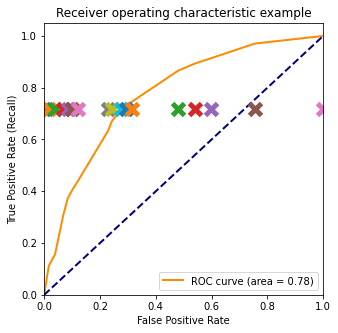

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(Y_train_t_val, clf_tree.predict(X_train_t_val))
tn, fp, fn, tp = confusion_matrix(Y_train_t_val, clf_tree.predict(X_train_t_val)).ravel()
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)
tnr = tn/(tn+fp)
fnr = fn/(tp+fn)
recall = tp/(tp+fn)
precision = tp/(tp+fp)

from sklearn import metrics
scores = clf_tree.predict_proba(X_train_t_val)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(Y_train_t_val, scores)
auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(5,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Decision Tree ROC-AUC')
plt.legend(loc="lower right");
plt.plot([fpr], [recall], marker="x", markeredgewidth=5, markersize=12);

# Ramdom Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=1, random_state=0).fit(X_train_t_tr, Y_train_t_tr)

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
param_grid = [{'n_estimators':[10,20,50],
               'max_depth':range(1,8),
               'min_samples_leaf':[10,20,100],
               'max_leaf_nodes':[2,4,8,16]}]

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), 
                           param_grid, 
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0), 
                           scoring='accuracy')

grid_search.fit(X_train_t_tr, Y_train_t_tr)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(random_state=0),
             param_grid=[{'max_depth': range(1, 8),
                          'max_leaf_nodes': [2, 4, 8, 16],
                          'min_samples_leaf': [10, 20, 100],
                          'n_estimators': [10, 20, 50]}],
             scoring='accuracy')

In [19]:
# a model trained using the best configuration on all folds
best_RF_model = grid_search.best_estimator_
best_RF_model

RandomForestClassifier(max_depth=6, max_leaf_nodes=16, min_samples_leaf=10,
                       n_estimators=10, random_state=0)

hyper parameter tunning

In [36]:
cvres = grid_search.cv_results_ # the variable that stores the grid search results
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):  # iterate over the tested configurations
    print(np.sqrt(-mean_score), params)

nan {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 10, 'n_estimators': 10}
nan {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 10, 'n_estimators': 20}
nan {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 10, 'n_estimators': 50}
nan {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 20, 'n_estimators': 10}
nan {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 20, 'n_estimators': 20}
nan {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 20, 'n_estimators': 50}
nan {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 100, 'n_estimators': 10}
nan {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 100, 'n_estimators': 20}
nan {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 100, 'n_estimators': 50}
nan {'max_depth': 1, 'max_leaf_nodes': 4, 'min_samples_leaf': 10, 'n_estimators': 10}
nan {'max_depth': 1, 'max_leaf_nodes': 4, 'min_samples_leaf': 10, 'n_estimators': 20}
nan {'max_depth': 1, 'max_leaf_nodes': 4, 'min_samp

C:\Users\Lily\AppData\Local\Temp\ipykernel_48704\3174474126.py:3: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(-mean_score), params)


In [37]:
grid_search.best_params_

{'max_depth': 7,
 'max_leaf_nodes': 16,
 'min_samples_leaf': 10,
 'n_estimators': 50}

In [21]:
from sklearn.model_selection import cross_validate
cross_validate(best_RF_model, X_train_t, Y_train, cv=5, return_estimator=True)

{'fit_time': array([0.0911386 , 0.08401895, 0.08400512, 0.0850141 , 0.08901882]),
 'score_time': array([0.00700116, 0.00699663, 0.00700355, 0.00700188, 0.00600219]),
 'estimator': [RandomForestClassifier(max_depth=6, max_leaf_nodes=16, min_samples_leaf=10,
                         n_estimators=10, random_state=0),
  RandomForestClassifier(max_depth=6, max_leaf_nodes=16, min_samples_leaf=10,
                         n_estimators=10, random_state=0),
  RandomForestClassifier(max_depth=6, max_leaf_nodes=16, min_samples_leaf=10,
                         n_estimators=10, random_state=0),
  RandomForestClassifier(max_depth=6, max_leaf_nodes=16, min_samples_leaf=10,
                         n_estimators=10, random_state=0),
  RandomForestClassifier(max_depth=6, max_leaf_nodes=16, min_samples_leaf=10,
                         n_estimators=10, random_state=0)],
 'test_score': array([0.71618205, 0.72313527, 0.70524984, 0.74383302, 0.74003795])}

[0.18346642 0.00147975 0.05678934 0.00939661 0.00357726 0.06941922
 0.03978755 0.01865288 0.10790997 0.00738982 0.00477554 0.02764535
 0.00310433 0.0058728  0.21907325 0.00107824 0.0022458  0.00228451
 0.05600738 0.08729092 0.0161127  0.0673919  0.0009377  0.
 0.         0.00831076 0.         0.         0.         0.
 0.         0.        ]


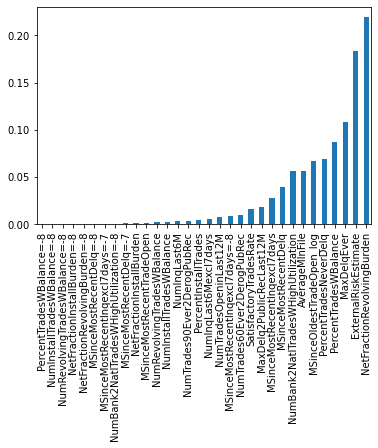

In [37]:
# create and fit model
clf_rf = RandomForestClassifier(max_depth=6, max_leaf_nodes=16, min_samples_leaf=10,n_estimators=10, random_state=0) # initialize an RF model
clf_rf = clf_rf.fit(X_train_t_tr, Y_train_t_tr)                                                           # train ensemble
print(clf_rf.feature_importances_)                                                 # print feature importance

# plot feature importance
pd.Series(data=clf_rf.feature_importances_, index=column_names).sort_values().plot.bar(); # visualize as bar plot
# how important each feature is when reducing the model errors

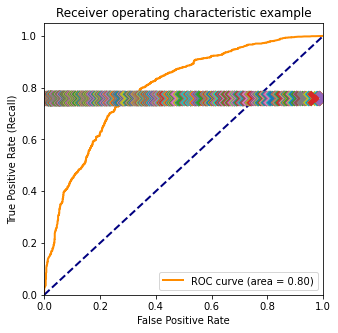

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(Y_train_t_val, clf_rf.predict(X_train_t_val))
tn, fp, fn, tp = confusion_matrix(Y_train_t_val, clf_rf.predict(X_train_t_val)).ravel()
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)
tnr = tn/(tn+fp)
fnr = fn/(tp+fn)
recall = tp/(tp+fn)
precision = tp/(tp+fp)

from sklearn import metrics
scores = clf_rf.predict_proba(X_train_t_val)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(Y_train_t_val, scores)
auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(5,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right");
plt.plot([fpr], [recall], marker="x", markeredgewidth=5, markersize=12);

# LGBM MODEL
What is LGBM classifier?
LightGBM is a fast, distributed, high performance gradient boosting framework based on decision tree algorithms, used for ranking, classification and many other machine learning tasks.

In [24]:
from sklearn.metrics import roc_auc_score
clf = lgb.LGBMClassifier()
    
test_pred_proba = np.zeros(Y_train_t_tr.shape[0])


clf.fit(X_train_t_tr, Y_train_t_tr, eval_set = [(X_train_t_tr, Y_train_t_tr), (X_train_t_val, Y_train_t_val)], eval_metric = 'auc', verbose = False, early_stopping_rounds = 100)
        
test_pred_proba= clf.predict_proba(X_train_t_val)

C:\Users\Lily\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Lily\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
param_grid = [ {'colsample_bytree': (0.8, 1), #the fraction of columns to be randomly samples
          'learning_rate': (.01, .02), 
          'num_leaves': (30, 40),  #max leaf nodes
          'subsample': (0.8, 1),  #fraction of observations to be randomly samples for each tree.
          'max_depth': (5, 10),  #maximum depth of a tree
          'reg_alpha': (.03, .05),  #L1 regularization
          'reg_lambda': (.06, .08), #L2 regularization
         }]

grid_search = GridSearchCV(lgb.LGBMClassifier(random_state=0), 
                           param_grid, 
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0), 
                           scoring='accuracy')

grid_search.fit(X_train_t_tr, Y_train_t_tr)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LGBMClassifier(random_state=0),
             param_grid=[{'colsample_bytree': (0.8, 1),
                          'learning_rate': (0.01, 0.02), 'max_depth': (5, 10),
                          'num_leaves': (30, 40), 'reg_alpha': (0.03, 0.05),
                          'reg_lambda': (0.06, 0.08), 'subsample': (0.8, 1)}],
             scoring='accuracy')

In [26]:
best_RF_model = grid_search.best_estimator_
best_RF_model

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.02, max_depth=5,
               num_leaves=40, random_state=0, reg_alpha=0.03, reg_lambda=0.08,
               subsample=0.8)

In [27]:
from sklearn.model_selection import cross_validate
cross_validate(best_RF_model, X_train_t, Y_train, cv=5, return_estimator=True)

{'fit_time': array([0.26446342, 0.19204283, 0.19504428, 0.21804857, 0.22505116]),
 'score_time': array([0.00700116, 0.00500083, 0.00600219, 0.0070014 , 0.00700212]),
 'estimator': [LGBMClassifier(colsample_bytree=0.8, learning_rate=0.02, max_depth=5,
                 num_leaves=40, random_state=0, reg_alpha=0.03, reg_lambda=0.08,
                 subsample=0.8),
  LGBMClassifier(colsample_bytree=0.8, learning_rate=0.02, max_depth=5,
                 num_leaves=40, random_state=0, reg_alpha=0.03, reg_lambda=0.08,
                 subsample=0.8),
  LGBMClassifier(colsample_bytree=0.8, learning_rate=0.02, max_depth=5,
                 num_leaves=40, random_state=0, reg_alpha=0.03, reg_lambda=0.08,
                 subsample=0.8),
  LGBMClassifier(colsample_bytree=0.8, learning_rate=0.02, max_depth=5,
                 num_leaves=40, random_state=0, reg_alpha=0.03, reg_lambda=0.08,
                 subsample=0.8),
  LGBMClassifier(colsample_bytree=0.8, learning_rate=0.02, max_depth=5,
     

In [24]:
cvres = grid_search.cv_results_ # the variable that stores the grid search results
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):  # iterate over the tested configurations
    print(np.sqrt(-mean_score), params)

nan {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'num_leaves': 30, 'reg_alpha': 0.03, 'reg_lambda': 0.06, 'subsample': 0.8}
nan {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'num_leaves': 30, 'reg_alpha': 0.03, 'reg_lambda': 0.06, 'subsample': 1}
nan {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'num_leaves': 30, 'reg_alpha': 0.03, 'reg_lambda': 0.08, 'subsample': 0.8}
nan {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'num_leaves': 30, 'reg_alpha': 0.03, 'reg_lambda': 0.08, 'subsample': 1}
nan {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'num_leaves': 30, 'reg_alpha': 0.05, 'reg_lambda': 0.06, 'subsample': 0.8}
nan {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'num_leaves': 30, 'reg_alpha': 0.05, 'reg_lambda': 0.06, 'subsample': 1}
nan {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'num_leaves': 30, 'reg_alpha': 0.05, 'reg_lambda': 0.08, 'subsample': 0.8

C:\Users\Lily\AppData\Local\Temp\ipykernel_48704\3174474126.py:3: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(-mean_score), params)


In [34]:
grid_search.best_estimator_

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.02, max_depth=5,
               num_leaves=30, random_state=0, reg_alpha=0.05, reg_lambda=0.08,
               subsample=0.8)

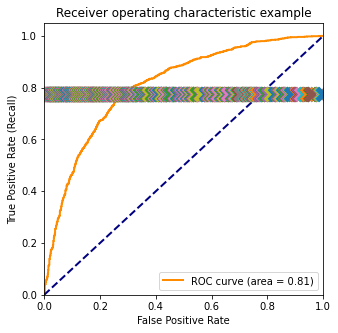

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(Y_train_t_val, best_RF_model.predict(X_train_t_val))
tn, fp, fn, tp = confusion_matrix(Y_train_t_val, best_RF_model.predict(X_train_t_val)).ravel()
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)
tnr = tn/(tn+fp)
fnr = fn/(tp+fn)
recall = tp/(tp+fn)
precision = tp/(tp+fp)

from sklearn import metrics
scores = best_RF_model.predict_proba(X_train_t_val)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(Y_train_t_val, scores)
auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(5,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('LGBMClassifier ROC-AUC')
plt.legend(loc="lower right");
plt.plot([fpr], [recall], marker="x", markeredgewidth=5, markersize=12);

In [29]:
print('LGBM accuracy: %.3f'%accuracy_score(Y_train_t_val, best_RF_model.predict(X_train_t_val)))

LGBM accuracy: 0.744


[225  77 328   7  18 197 106  17  27  38 220 229  55  17 290  95  57  52
  59 153  86 229   1  88   5  71   0   2   0   5  13   0]


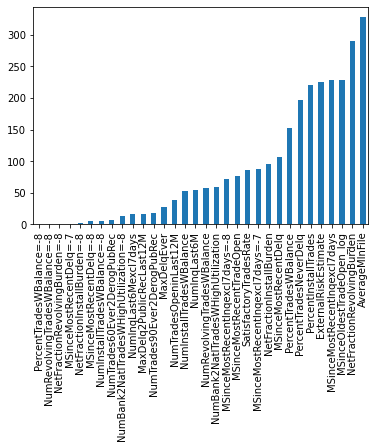

In [31]:
# create and fit model
print(best_RF_model.feature_importances_)                                                 # print feature importance

# plot feature importance
pd.Series(data=best_RF_model.feature_importances_, index=column_names).sort_values().plot.bar(); # visualize as bar plot
# how important each feature is when reducing the model errors

# Feature Processing

In [5]:
temp_good = df.loc[df['RiskPerformance'] == 'Good', cols_numeric].mean()
temp_bad = df.loc[df['RiskPerformance'] == 'Bad', cols_numeric].mean()

df_avg_feature_value_per_group = pd.concat([temp_bad, temp_good], axis=1)

df_avg_feature_value_per_group.index.name = 'RiskPerformance'
df_avg_feature_value_per_group.columns = ['Bad', 'Good']
df_avg_feature_value_per_group['Diff'] = df_avg_feature_value_per_group['Bad']/df_avg_feature_value_per_group['Good']
df_avg_feature_value_per_group['Significant_bad'] = df_avg_feature_value_per_group['Diff']>1.14
df_avg_feature_value_per_group['Significant_good'] = df_avg_feature_value_per_group['Diff']<0.87
df_avg_feature_value_per_group['Significant'] = df_avg_feature_value_per_group['Significant_bad'] + df_avg_feature_value_per_group['Significant_good']

In [6]:
df_avg_feature_value_per_group.loc[:,['Bad', 'Good', 'Significant']]

,Bad,Good,Significant
RiskPerformance,,,
ExternalRiskEstimate,63.044147,72.2096,False
MSinceOldestTradeOpen,164.770288,205.4246,True
MSinceMostRecentTradeOpen,7.945961,9.1958,True
AverageMInFile,66.080051,82.3192,True
NumSatisfactoryTrades,17.896318,21.1004,True
NumTrades60Ever2DerogPubRec,0.204433,-0.1338,True
NumTrades90Ever2DerogPubRec,-0.044514,-0.2502,True
PercentTradesNeverDelq,83.625756,89.9760,False
MSinceMostRecentDelq,7.882030,5.5400,True


In [9]:
#  function
import seaborn as sns
def drawDensity(inputCol):
    data = df.loc[:,[inputCol, 'RiskPerformance']]
    p = sns.kdeplot(data=data, x=inputCol, hue="RiskPerformance", fill=True, common_norm=False, alpha=0.6, palette="viridis", legend=False)
    # control x limit
    plt.show()

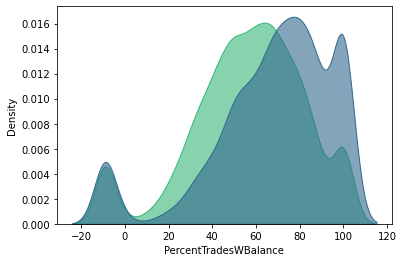

In [10]:
drawDensity('PercentTradesWBalance')

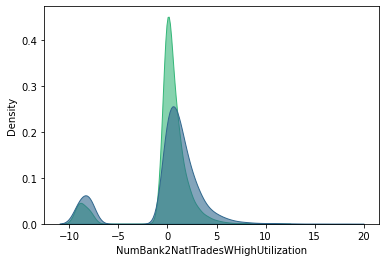

In [11]:
drawDensity('NumBank2NatlTradesWHighUtilization')

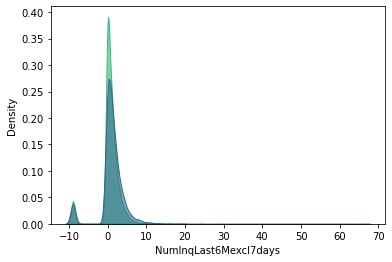

In [12]:
drawDensity('NumInqLast6Mexcl7days')

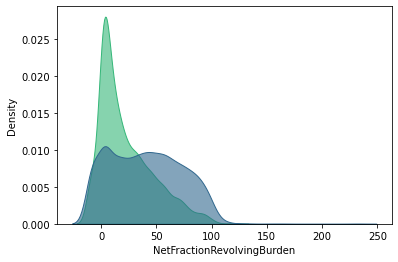

In [13]:
drawDensity('NetFractionRevolvingBurden')

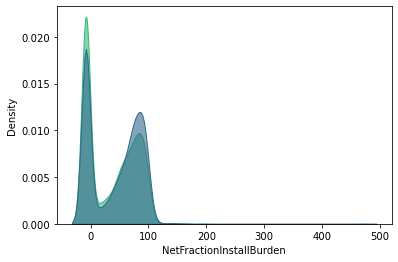

In [14]:
drawDensity('NetFractionInstallBurden')

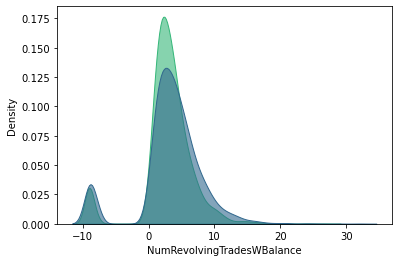

In [15]:
drawDensity('NumRevolvingTradesWBalance')

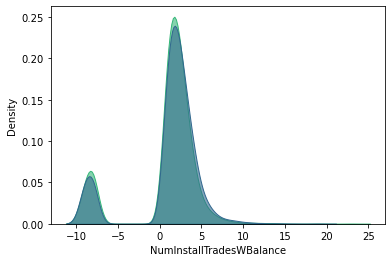

In [16]:
drawDensity('NumInstallTradesWBalance') # very similar

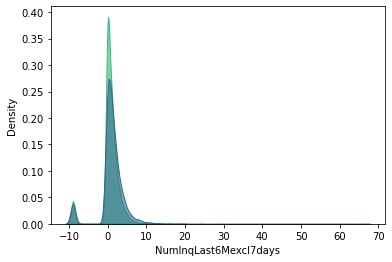

In [17]:
drawDensity('NumInqLast6Mexcl7days')

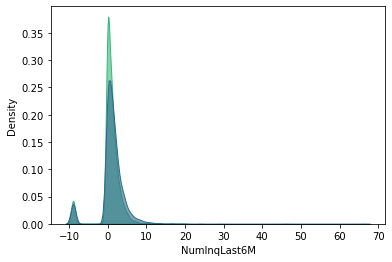

In [18]:
drawDensity('NumInqLast6M')

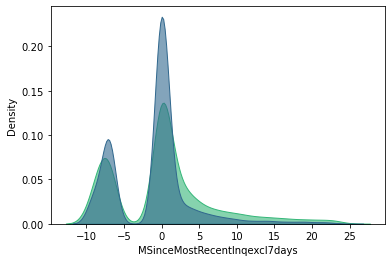

In [19]:
drawDensity('MSinceMostRecentInqexcl7days')

C:\Users\Lily\AppData\Local\Temp\ipykernel_24100\578361421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['NumInstallTradesWBalance'] = np.power((df['NumInstallTradesWBalance']),1/7)


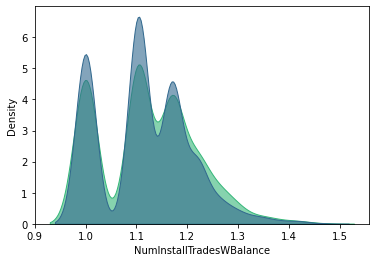

In [38]:
temp['NumInstallTradesWBalance'] = np.power((df['NumInstallTradesWBalance']),1/7)
data = temp.loc[:,['NumInstallTradesWBalance', 'RiskPerformance']]
p = sns.kdeplot(data=data, x='NumInstallTradesWBalance', hue="RiskPerformance", fill=True, common_norm=False, alpha=0.6, palette="viridis", legend=False)
# control x limit
plt.show()

In [38]:
# Gird Search —— best model evaluation
from sklearn.metrics import accuracy_score
from sklearn import tree, linear_model
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
clf_tree    = tree.DecisionTreeClassifier(max_depth=4,min_samples_leaf=20).fit(X_train_t_tr, Y_train_t_tr)
clf_log_reg = linear_model.LogisticRegression(C=2.212216291070449, max_iter=10000,solver='liblinear').fit(X_train_t_tr, Y_train_t_tr) 
clf_rf      = RandomForestClassifier(max_depth=7, max_leaf_nodes=16, min_samples_leaf=10,n_estimators=50, random_state=0).fit(X_train_t_tr, Y_train_t_tr) 
clf_lgbm    = lgb.LGBMClassifier(colsample_bytree=0.8, learning_rate=0.02, max_depth=5,num_leaves=30, random_state=0, reg_alpha=0.05, reg_lambda=0.08,subsample=0.8).fit(X_train_t_tr, Y_train_t_tr) 

print('Decision tree accuracy: %.3f'%accuracy_score(Y_train_t_val, clf_tree.predict(X_train_t_val)))
print('Logistic regression accuracy: %.3f'%accuracy_score(Y_train_t_val, clf_log_reg.predict(X_train_t_val)))
print('Random Forest accuracy: %.3f'%accuracy_score(Y_train_t_val, clf_rf.predict(X_train_t_val)))
print('LGBM accuracy: %.3f'%accuracy_score(Y_train_t_val, clf_lgbm.predict(X_train_t_val)))

Decision tree accuracy: 0.718
Logistic regression accuracy: 0.746
Random Forest accuracy: 0.735
LGBM accuracy: 0.747


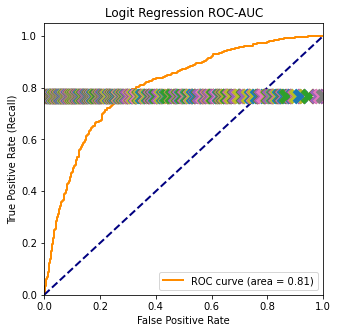

In [12]:
# ROC-AUC with Logit-model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(Y_train_t_val, clf_log_reg.predict(X_train_t_val))
tn, fp, fn, tp = confusion_matrix(Y_train_t_val, clf_log_reg.predict(X_train_t_val)).ravel()
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)
tnr = tn/(tn+fp)
fnr = fn/(tp+fn)
recall = tp/(tp+fn)
precision = tp/(tp+fp)

from sklearn import metrics
scores = clf_log_reg.predict_proba(X_train_t_val)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(Y_train_t_val, scores)
auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(5,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Logit Regression ROC-AUC')
plt.legend(loc="lower right");
plt.plot([fpr], [recall], marker="x", markeredgewidth=5, markersize=12);

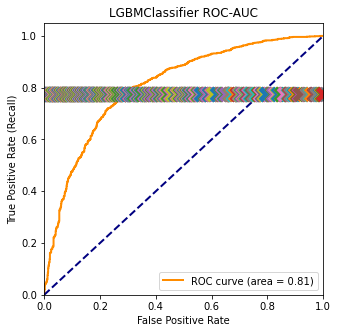

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(Y_train_t_val, clf_lgbm.predict(X_train_t_val))
tn, fp, fn, tp = confusion_matrix(Y_train_t_val, clf_lgbm.predict(X_train_t_val)).ravel()
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)
tnr = tn/(tn+fp)
fnr = fn/(tp+fn)
recall = tp/(tp+fn)
precision = tp/(tp+fp)

from sklearn import metrics
scores = clf_lgbm.predict_proba(X_train_t_val)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(Y_train_t_val, scores)
auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(5,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('LGBMClassifier ROC-AUC')
plt.legend(loc="lower right");
plt.plot([fpr], [recall], marker="x", markeredgewidth=5, markersize=12);

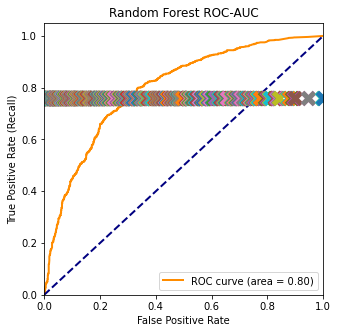

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(Y_train_t_val, clf_rf.predict(X_train_t_val))
tn, fp, fn, tp = confusion_matrix(Y_train_t_val, clf_rf.predict(X_train_t_val)).ravel()
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)
tnr = tn/(tn+fp)
fnr = fn/(tp+fn)
recall = tp/(tp+fn)
precision = tp/(tp+fp)

from sklearn import metrics
scores = clf_rf.predict_proba(X_train_t_val)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(Y_train_t_val, scores)
auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(5,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Random Forest ROC-AUC')
plt.legend(loc="lower right");
plt.plot([fpr], [recall], marker="x", markeredgewidth=5, markersize=12);

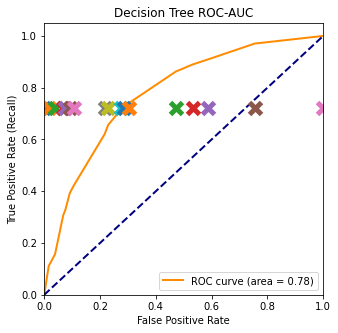

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(Y_train_t_val, clf_tree.predict(X_train_t_val))
tn, fp, fn, tp = confusion_matrix(Y_train_t_val, clf_tree.predict(X_train_t_val)).ravel()
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)
tnr = tn/(tn+fp)
fnr = fn/(tp+fn)
recall = tp/(tp+fn)
precision = tp/(tp+fp)

from sklearn import metrics
scores = clf_tree.predict_proba(X_train_t_val)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(Y_train_t_val, scores)
auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(5,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Decision Tree ROC-AUC')
plt.legend(loc="lower right");
plt.plot([fpr], [recall], marker="x", markeredgewidth=5, markersize=12);

In [19]:
from sklearn.model_selection import cross_validate
cv_results_tree    = cross_validate(tree.DecisionTreeClassifier(max_depth=4,min_samples_leaf=20), X_train_t, Y_train, cv=5, return_estimator=True)
cv_results_log_reg = cross_validate(linear_model.LogisticRegression(C=2.212216291070449, max_iter=10000,solver='liblinear'), X_train_t, Y_train, cv=5, return_estimator=True)
cv_results_rf      = cross_validate(RandomForestClassifier(max_depth=6, max_leaf_nodes=16, min_samples_leaf=10,n_estimators=10, random_state=0), X_train_t, Y_train, cv=5, return_estimator=True)
cv_results_lgbm    = cross_validate(lgb.LGBMClassifier(colsample_bytree=0.8, learning_rate=0.02, max_depth=5,num_leaves=40, random_state=0, reg_alpha=0.03, reg_lambda=0.08,subsample=0.8), X_train, Y_train, cv=5, return_estimator=True) 

print('Classification tree - CV accuracy score %.3f'%cv_results_tree['test_score'].mean()) # this is their average value
print('Logistic regresion - CV accuracy score %.3f'%cv_results_log_reg['test_score'].mean()) # this is their average value
print('Random Forest - CV accuracy score %.3f'%cv_results_rf['test_score'].mean()) # this is their average value
print('LGBMClassifier - CV accuracy score %.3f'%cv_results_lgbm['test_score'].mean()) # this is their average value


Classification tree - CV accuracy score 0.713
Logistic regresion - CV accuracy score 0.738
Random Forest - CV accuracy score 0.728
LGBMClassifier - CV accuracy score 0.735


In [17]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
y_pred= clf_log_reg.predict(X_train_t_val)
cf_log_matrix = confusion_matrix(Y_train_t_val, y_pred)
print(cf_log_matrix)

[[665 260]
 [243 809]]


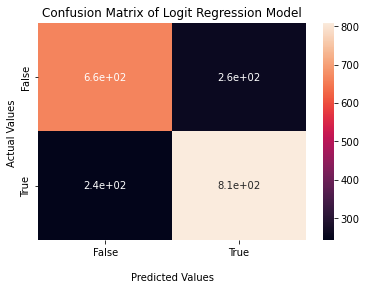

In [33]:
import seaborn as sns

ax = sns.heatmap(cf_log_matrix, annot=True)

ax.set_title('Confusion Matrix of Logit Regression Model');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

[[638 287]
 [252 800]]


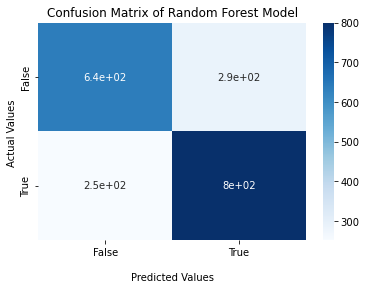

In [19]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
y_pred= clf_rf.predict(X_train_t_val)
cf_rf_matrix = confusion_matrix(Y_train_t_val, y_pred)
print(cf_rf_matrix)

import seaborn as sns

ax = sns.heatmap(cf_rf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix of Random Forest Model');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

[[663 262]
 [237 815]]


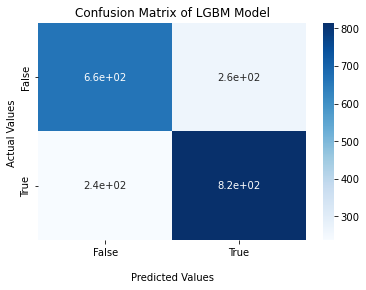

In [22]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
y_pred= clf_lgbm.predict(X_train_t_val)
cf_lgbm_matrix = confusion_matrix(Y_train_t_val, y_pred)
print(cf_lgbm_matrix)

import seaborn as sns

ax = sns.heatmap(cf_lgbm_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix of LGBM Model');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

[[660 265]
 [292 760]]


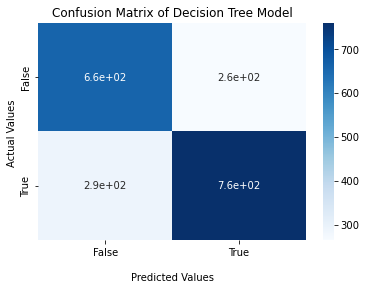

In [21]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
y_pred= clf_tree.predict(X_train_t_val)
cf_tree_matrix = confusion_matrix(Y_train_t_val, y_pred)
print(cf_tree_matrix)

import seaborn as sns

ax = sns.heatmap(cf_tree_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix of Decision Tree Model');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Logit Model Grid research

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
param_grid = [{'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]

grid_search = GridSearchCV(estimator = linear_model.LogisticRegression(),  
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_search.fit(X_train_t_tr, Y_train_t_tr)

C:\Users\Lily\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lily\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\Lily\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lily\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\Lily\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lily\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
                         {'penalty': ['l1', 'l2']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
             scoring='accuracy')

In [28]:
grid_search.best_estimator_

LogisticRegression(solver='liblinear')

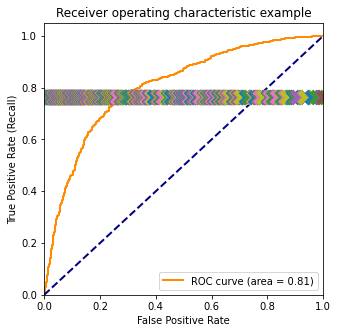

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(Y_train_t_val, best_log_model.predict(X_train_t_val))
tn, fp, fn, tp = confusion_matrix(Y_train_t_val, best_log_model.predict(X_train_t_val)).ravel()
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)
tnr = tn/(tn+fp)
fnr = fn/(tp+fn)
recall = tp/(tp+fn)
precision = tp/(tp+fp)

from sklearn import metrics
scores = best_log_model.predict_proba(X_train_t_val)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(Y_train_t_val, scores)
auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(5,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right");
plt.plot([fpr], [recall], marker="x", markeredgewidth=5, markersize=12);